In [1]:
import os
import sys
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
sys.path.append("../src")

from preprocessing import load_unsw_data, preprocess_data

In [3]:
df = load_unsw_data("../data/")
X_train, X_test, y_train, y_test = preprocess_data(df)
print(f"[✔] Loaded dataset. Test shape: {X_test.shape}")

[✔] Loaded dataset. Test shape: (617825, 48)


In [4]:
models_dir = "../outputs/models/"
model_files = {
    "Logistic Regression": "logistic_regression.pkl",
    "Random Forest": "random_forest.pkl",
    "XGBoost": "xgboost.pkl",
    "LightGBM": "lightgbm.pkl"
}

models = {}
for name, file in model_files.items():
    path = os.path.join(models_dir, file)
    if os.path.exists(path):
        models[name] = joblib.load(path)
        print(f"[✔] Loaded {name}")
    else:
        print(f"[⚠] {file} not found. Skipping...")

[✔] Loaded Logistic Regression
[✔] Loaded Random Forest
[✔] Loaded XGBoost
[✔] Loaded LightGBM


In [5]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

results_df = pd.DataFrame(results).sort_values(by="F1-score", ascending=False)
results_df.reset_index(drop=True, inplace=True)
print("\n=== Summary ===")
display(results_df)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    587932
           1     1.0000    0.9995    0.9997     29893

    accuracy                         1.0000    617825
   macro avg     1.0000    0.9997    0.9999    617825
weighted avg     1.0000    1.0000    1.0000    617825


=== Random Forest ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    587932
           1     1.0000    1.0000    1.0000     29893

    accuracy                         1.0000    617825
   macro avg     1.0000    1.0000    1.0000    617825
weighted avg     1.0000    1.0000    1.0000    617825


=== XGBoost ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    587932
           1     1.0000    1.0000    1.0000     29893

    accuracy                         1.0000    617825
   macro avg     1.0000    1.0000    1.0000    617825
weigh

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,XGBoost,1.000000,1.000000,1.000000,1.000000
2,LightGBM,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.999976,0.999976,0.999976,0.999976


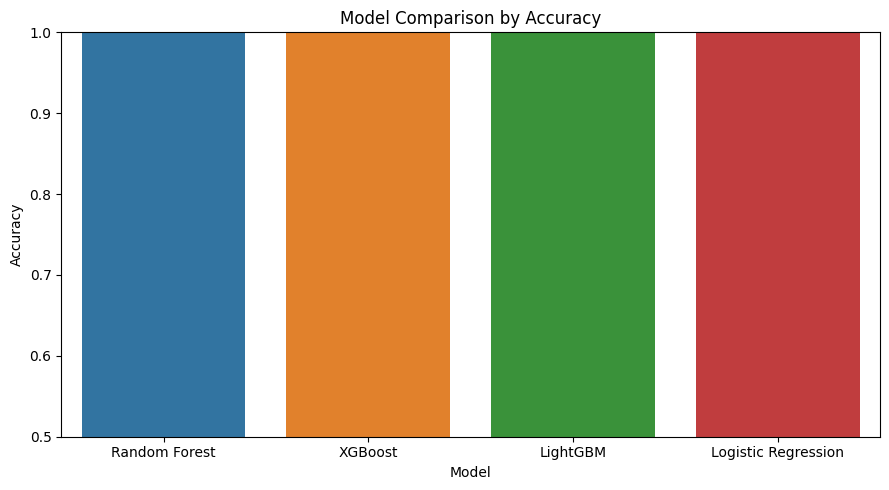

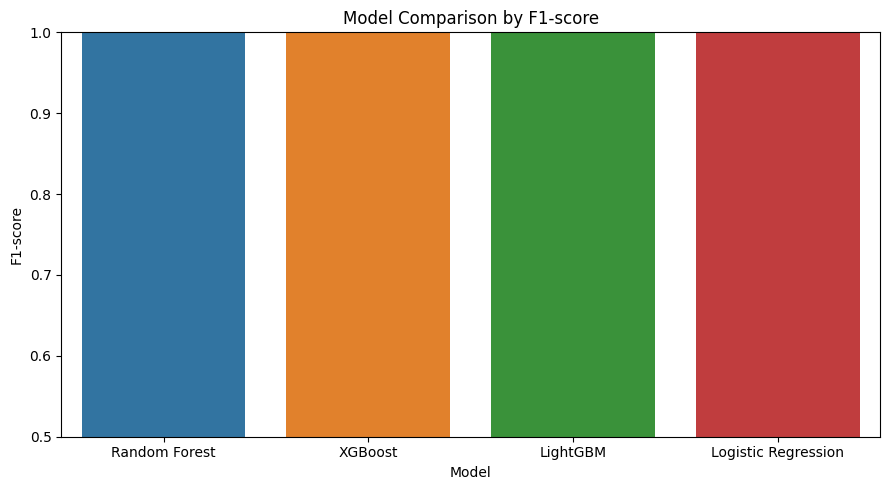

In [6]:
plt.figure(figsize=(9,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, hue="Model", dodge=False)
plt.title("Model Comparison by Accuracy")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.savefig("../outputs/figures/model_accuracy_comparison.png", dpi=300)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(x="Model", y="F1-score", data=results_df, hue="Model", dodge=False)
plt.title("Model Comparison by F1-score")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.savefig("../outputs/figures/model_f1_comparison.png", dpi=300)
plt.show()

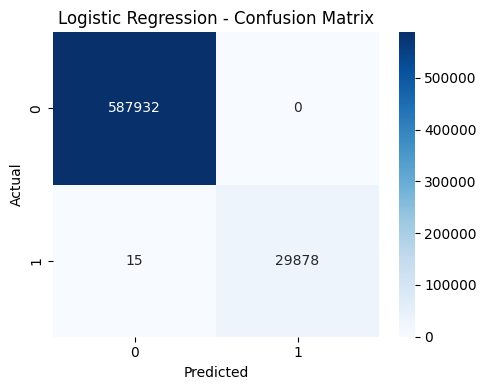

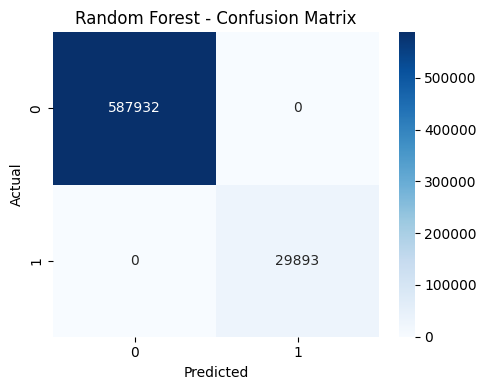

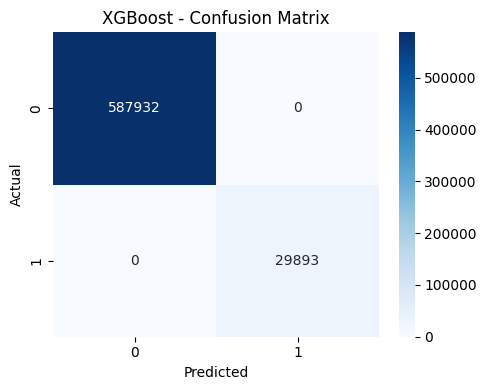

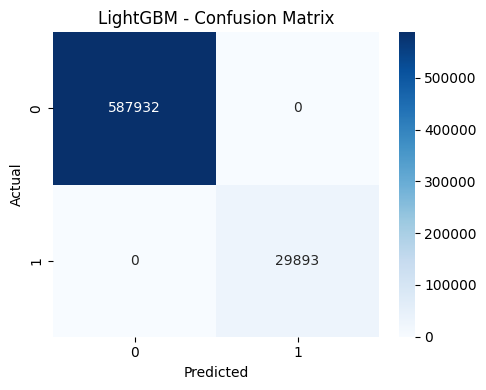

In [7]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"../outputs/figures/{name.replace(' ', '_')}_confusion_matrix.png", dpi=300)
    plt.show()

In [9]:
best_model = results_df.iloc[0]
print("=== 🏆 Best Performing Model ===")
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"F1-score: {best_model['F1-score']:.4f}")

=== 🏆 Best Performing Model ===
Model: Random Forest
Accuracy: 1.0000
F1-score: 1.0000
